In [64]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Input, GlobalAveragePooling2D
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import os
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv


In [65]:
root_dir = "Datasets/landscapes/train"

filesInDirectory = {}
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir,subdir)
    
    file_count = [f for f in os.listdir(subdir_path)]
    filesInDirectory[subdir] = len(file_count)

print(filesInDirectory)

{'buildings': 2191, 'forest': 2271, 'glacier': 2404, 'mountain': 2512, 'sea': 2274, 'street': 2382}


In [66]:
images = []
labels = []

for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir,subdir)

    counter = 0
    for image_file in os.listdir(subdir_path):
        
        if counter == 2190:
            break

        image_path = os.path.join(subdir_path,image_file)
        
        image = cv.imread(image_path)

        image = cv.resize(image,(100, 100))
        image = cv.cvtColor(image,cv.COLOR_BGR2RGB)

        images.append(image)
        labels.append(subdir)

        counter += 1

print(len(images))
print(len(labels))

13140
13140


In [67]:
root_dir = "Datasets/landscapes/test"

filesInDirectory = {}
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir,subdir)
    
    file_count = [f for f in os.listdir(subdir_path)]
    filesInDirectory[subdir] = len(file_count)

print(filesInDirectory)

{'buildings': 437, 'forest': 474, 'glacier': 553, 'mountain': 525, 'sea': 510, 'street': 501}


In [68]:
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir,subdir)

    counter = 0
    for image_file in os.listdir(subdir_path):
        
        if counter == 436:
            break

        image_path = os.path.join(subdir_path,image_file)
        
        image = cv.imread(image_path)

        image = cv.resize(image,(100, 100))
        image = cv.cvtColor(image,cv.COLOR_BGR2RGB)

        images.append(image)
        labels.append(subdir)

        counter += 1

print(len(images))
print(len(labels))

15756
15756


glacier


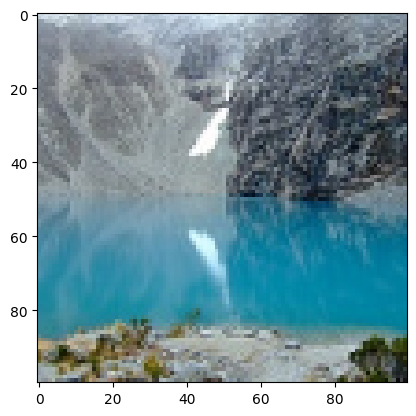

In [69]:
plt.imshow(images[5000])
print(labels[5000])

In [70]:
def preprocess(image):
    return tf.cast(image / 255.0 ,tf.float16)

images = list(map(preprocess,images))
len(images)

15756

In [71]:

encoder = LabelEncoder()

labels = np.array(labels).reshape(-1,1)
labels = encoder.fit_transform(labels)

c:\Users\Devve\Documents\Tensorflow Env\venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
labels[5000:5005]

array([2, 2, 2, 2, 2], dtype=int64)

In [73]:
images = np.array(images)
print(images.shape)

(15756, 100, 100, 3)


In [74]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.1, random_state=42)

In [75]:

# Model definition
model = Sequential()

model.add(Input((100, 100, 3)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(6,activation='softmax'))

# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


# Fit the model using the data generator
history = model.fit(X_train, y_train,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    epochs=20,
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 121s 264ms/step - accuracy: 0.4745 - loss: 1.3314 - val_accuracy: 0.6770 - val_loss: 0.8543 - learning_rate: 0.0100
Epoch 2/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 116s 262ms/step - accuracy: 0.6543 - loss: 0.8857 - val_accuracy: 0.5381 - val_loss: 1.2624 - learning_rate: 0.0100
Epoch 3/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 116s 262ms/step - accuracy: 0.7312 - loss: 0.7347 - val_accuracy: 0.7107 - val_loss: 0.8175 - learning_rate: 0.0100
Epoch 4/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 117s 263ms/step - accuracy: 0.7691 - loss: 0.6522 - val_accuracy: 0.3769 - val_loss: 2.9760 - learning_rate: 0.0100
Epoch 5/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 116s 261ms/step - accuracy: 0.7814 - loss: 0.6003 - val_accuracy: 0.8179 - val_loss: 0.5403 - learning_rate: 0.0100
Epoch 6/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 116s 262ms/step - accuracy: 0.7965 - loss: 0.5699 - val_accuracy: 0.7259 - val_loss: 0.8459 - learning_rate: 0.0100
Epoch 7/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 117s 263ms/step - accura

In [76]:
import pickle

pickle.dump(model,open('model.pkl','wb'))